In [ ]:
############## Part to Whole Analysis
# Importing Necessary libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

server = 'LAPTOP-LFBT0G3K'
database = 'DataWarehouse'
driver = '{ODBC Driver 18 for SQL Server}'

cnxn = None

In [ ]:
# Connection and query loading
try:
    connection_string = (
        f'DRIVER={driver};'
        f'SERVER={server};'
        f'DATABASE={database};'
        'Trusted_Connection=yes;'
        'Encrypt=yes;'
        'TrustServerCertificate=yes;'
    )
    
    print(f"Attempting to connect to {server}/{database} using driver: {driver}")
    cnxn = pyodbc.connect(connection_string)
    print("Successfully connected to SQL Server!")
    
    sql_analysis_query="""
        SELECT
            YEAR(order_date) AS order_year,
            MONTH(order_date) AS order_month,
            SUM(sales_amount) AS total_sales,
            COUNT(DISTINCT customer_key) AS total_customers,
            SUM(quantity) AS total_quantity

        FROM gold.fact_sales
        WHERE order_date IS NOT NULL
        GROUP BY YEAR(order_date), MONTH(order_date)
        ORDER BY YEAR(order_date), MONTH(order_date);
    """
    df_sales_analysis=pd.read_sql(sql_analysis_query,cnxn)

except pyodbc.Error as ex:
    sqlstate = ex.args[0]
    print(f"Connection or query error: {ex}")
    if 'IM002' in sqlstate:
        print(f"  --> Driver '{driver}' not found or improperly configured.")
    elif '08001' in sqlstate:
        print(f"  --> Connection failed. Verify server name, database, and network connectivity.")
    elif '28000' in sqlstate:
        print(f"  --> Authentication error. Ensure your Windows user has appropriate SQL Server permissions.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    if cnxn:
        cnxn.close()
        print("\nConnection closed.")

Attempting to connect to LAPTOP-LFBT0G3K/DataWarehouse using driver: {ODBC Driver 18 for SQL Server}
Successfully connected to SQL Server!


C:\Users\Ayush\AppData\Local\Temp\ipykernel_8792\1350176231.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_analysis=pd.read_sql(sql_analysis_query,cnxn)


In [ ]:
# Testing our data
print('first 5 rows fo sales analysis Data : ')
print(df_sales_analysis.head())
print('\nSales Analysis Data info : ')
print(df_sales_analysis.info())

first 5 rows fo sales analysis Data : 
   order_year  order_month  total_sales  total_customers  total_quantity
0        2010           12        43419               14              14
1        2011            1       469795              144             144
2        2011            2       466307              144             144
3        2011            3       485165              150             150
4        2011            4       502042              157             157

Sales Analysis Data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   order_year       38 non-null     int64
 1   order_month      38 non-null     int64
 2   total_sales      38 non-null     int64
 3   total_customers  38 non-null     int64
 4   total_quantity   38 non-null     int64
dtypes: int64(5)
memory usage: 1.6 KB
None


In [14]:
# Data Preprocessing for viz
df_sales_analysis['order_period']=pd.to_datetime(
    df_sales_analysis['order_year'].astype(str)+'-'+
    df_sales_analysis['order_month'].astype(str)+'-01'
)


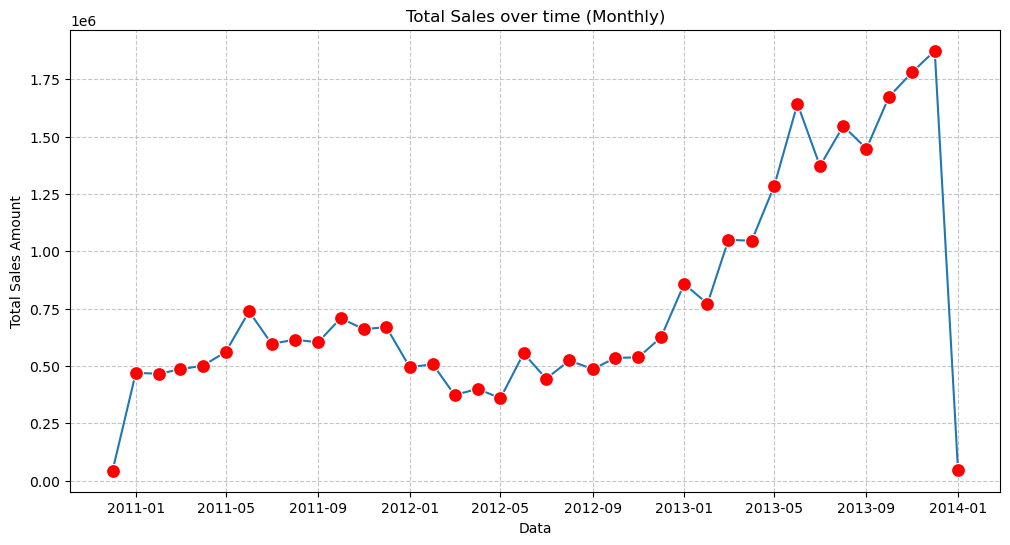

In [15]:
# Visualization

# 1.Total sales over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sales_analysis,x='order_period',y='total_sales',marker='o')
sns.scatterplot(data=df_sales_analysis,x='order_period',y='total_sales',color='red',s=100,zorder=5)
plt.title('Total Sales over time (Monthly)')
plt.xlabel('Data')
plt.ylabel('Total Sales Amount')
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout
plt.show()

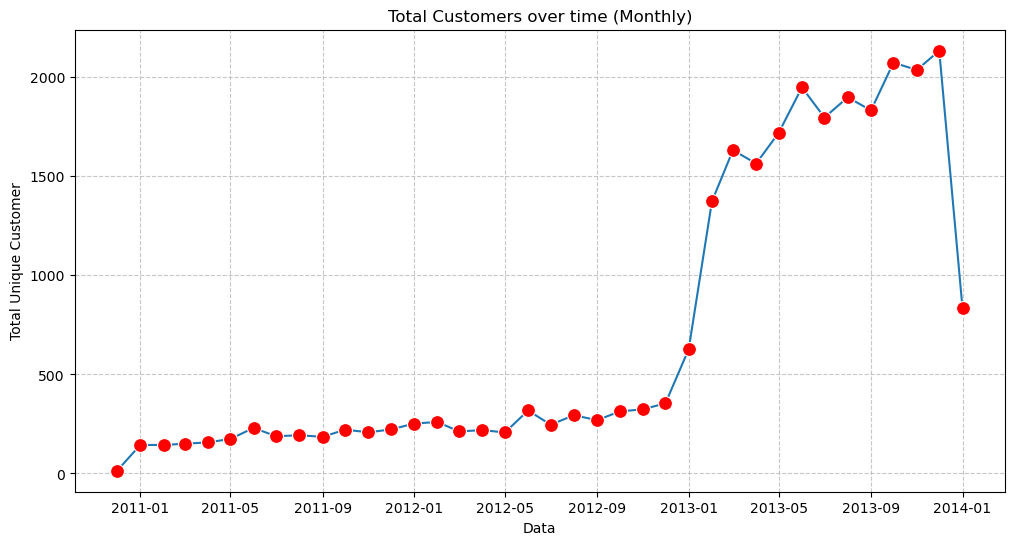

In [16]:
# Total customer over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sales_analysis,x='order_period',y='total_customers',marker='o')
sns.scatterplot(data=df_sales_analysis,x='order_period',y='total_customers',color='red',s=100,zorder=5)
plt.title('Total Customers over time (Monthly)')
plt.xlabel('Data')
plt.ylabel('Total Unique Customer')
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout
plt.show()

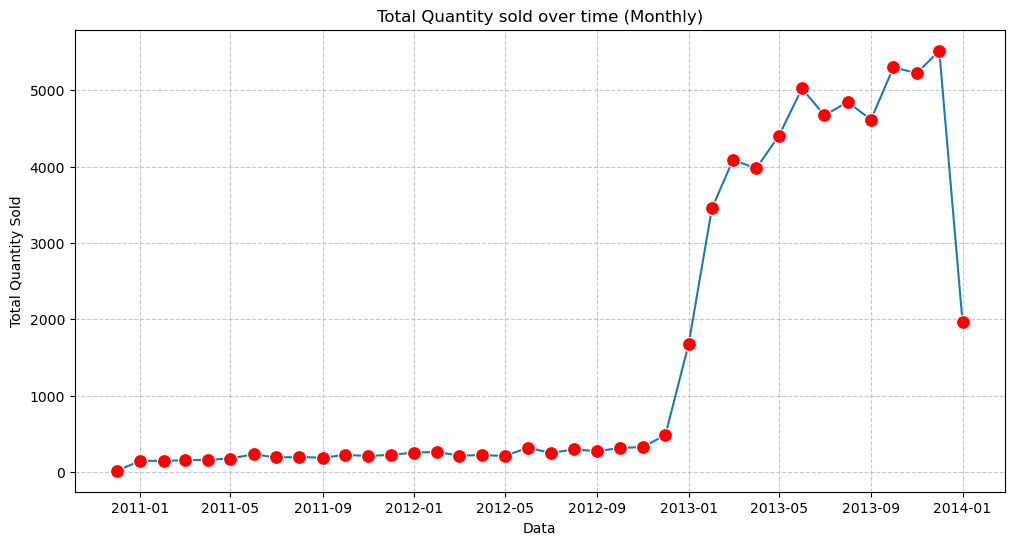

In [17]:
# Total Quantity sold over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sales_analysis,x='order_period',y='total_quantity',marker='o')
sns.scatterplot(data=df_sales_analysis,x='order_period',y='total_quantity',color='red',s=100,zorder=5)
plt.title('Total Quantity sold over time (Monthly)')
plt.xlabel('Data')
plt.ylabel('Total Quantity Sold')
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout
plt.show()

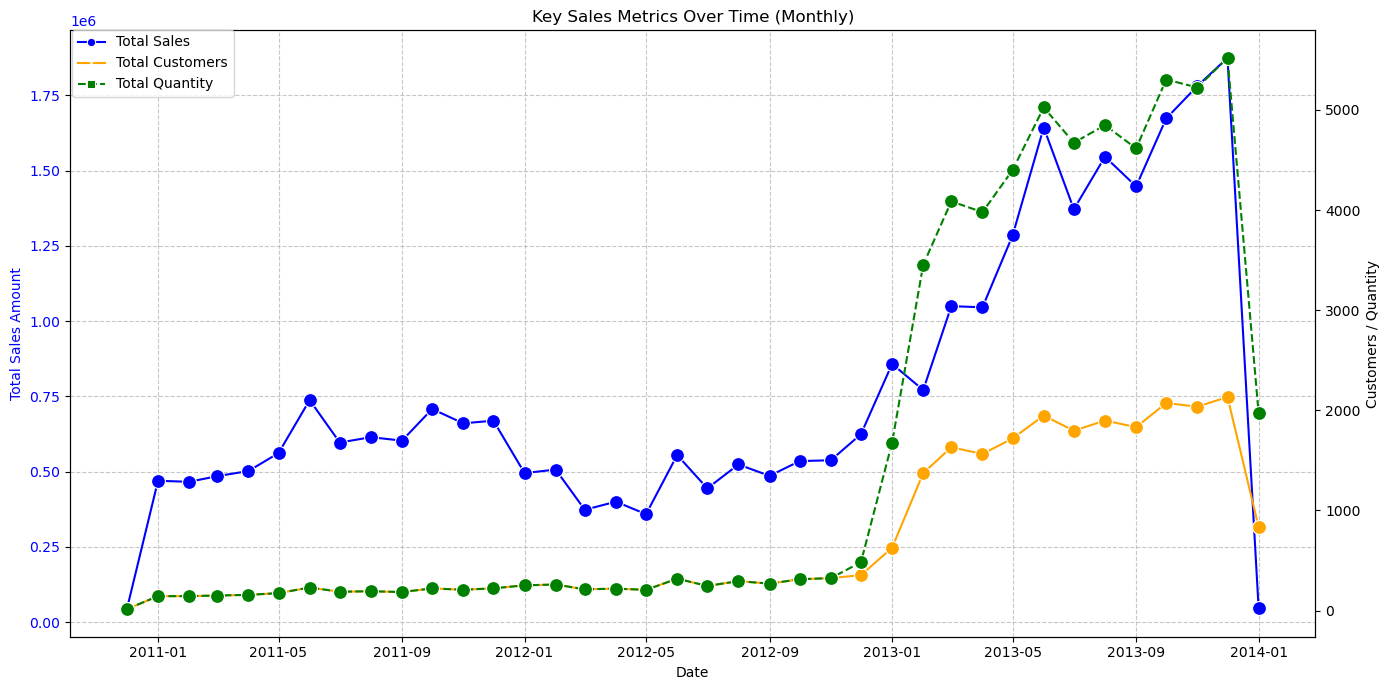

In [ ]:
# 4. Combined Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Total Sales on primary y-axis (ax1)
sns.lineplot(data=df_sales_analysis, x='order_period', y='total_sales', marker='o', ax=ax1, label='Total Sales', color='blue',legend=False)
sns.scatterplot(data=df_sales_analysis, x='order_period', y='total_sales', color='blue', s=100, zorder=5, ax=ax1,legend=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales Amount', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Total Sales on secondary y-axis (ax2)
ax2 = ax1.twinx()
sns.lineplot(data=df_sales_analysis, x='order_period', y='total_customers', marker='x', ax=ax2, label='Total Customers', color='orange',legend=False)
sns.scatterplot(data=df_sales_analysis, x='order_period', y='total_customers', color='orange', s=100, zorder=5, ax=ax2,legend=False)

    # Plot Total Quantity on secondary y-axis (ax2) as well
sns.lineplot(data=df_sales_analysis, x='order_period', y='total_quantity', marker='s', ax=ax2, label='Total Quantity', color='green', linestyle='--',legend=False)
sns.scatterplot(data=df_sales_analysis, x='order_period', y='total_quantity', color='green', s=100, zorder=5, ax=ax2,legend=False)
ax2.set_ylabel('Customers / Quantity', color='black')
ax2.tick_params(axis='y')


plt.title('Key Sales Metrics Over Time (Monthly)')
fig.legend(loc="upper left", bbox_to_anchor=(0.05,0.96))
plt.tight_layout()
plt.show()